In [41]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf 
tf.random.set_seed(0)

In [42]:
import matplotlib.pyplot as plt 
from tensorflow.keras import datasets,layers,models

In [43]:
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [44]:
len(train_images)

60000

In [45]:
len(train_labels)

60000

In [46]:
len(test_images)

10000

In [47]:
train_images.shape

(60000, 28, 28)

In [48]:
test_images.shape

(10000, 28, 28)

In [49]:
type(train_images)

numpy.ndarray

In [50]:
type(test_images)

numpy.ndarray

In [51]:
type(train_labels)

numpy.ndarray

In [52]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

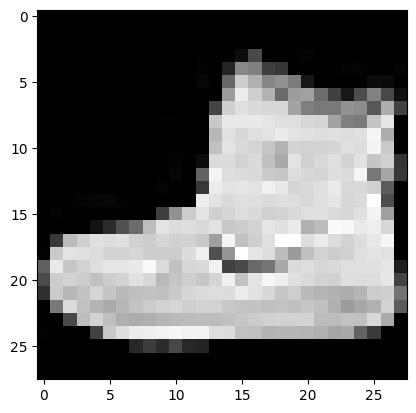

In [53]:
plt.imshow(train_images[0],cmap='gray')
plt.show()

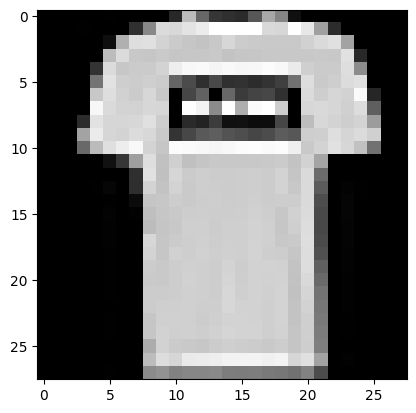

In [54]:
plt.imshow(train_images[1],cmap='gray')
plt.show()

In [55]:
print(train_labels[0])
print(train_labels[1])

9
0


In [56]:
values, counts = np.unique(train_labels, return_counts=True)
print(values)  # Unique labels
print(counts)  # Count of each label


[0 1 2 3 4 5 6 7 8 9]
[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


In [57]:
train_images=train_images/255
test_images=test_images/255

In [58]:

train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [59]:
# Reshape images to specify that it's a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
     

In [60]:
train_images.shape

(60000, 28, 28, 1)

In [61]:
test_images.shape

(10000, 28, 28, 1)

In [70]:
from tensorflow.keras.layers import Dropout, BatchNormalization, Dense, Flatten
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10))  # logits (no softmax)



In [71]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [72]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(train_images, train_labels,
                    epochs=30,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stop])


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.7758 - loss: 0.6215 - val_accuracy: 0.8625 - val_loss: 0.3796
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8678 - loss: 0.3566 - val_accuracy: 0.8847 - val_loss: 0.3361
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8837 - loss: 0.3172 - val_accuracy: 0.8841 - val_loss: 0.3222
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8940 - loss: 0.2864 - val_accuracy: 0.8985 - val_loss: 0.2876
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9028 - loss: 0.2643 - val_accuracy: 0.8912 - val_loss: 0.3175
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9044 - loss: 0.2558 - val_accuracy: 0.9003 - val_loss: 0.2961
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9121 - loss: 0.2394 - val_accuracy: 0.9014 - val_loss: 0.2918


In [73]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print("The Accuracy is ",test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9014 - loss: 0.2918
The Accuracy is  0.9014000296592712


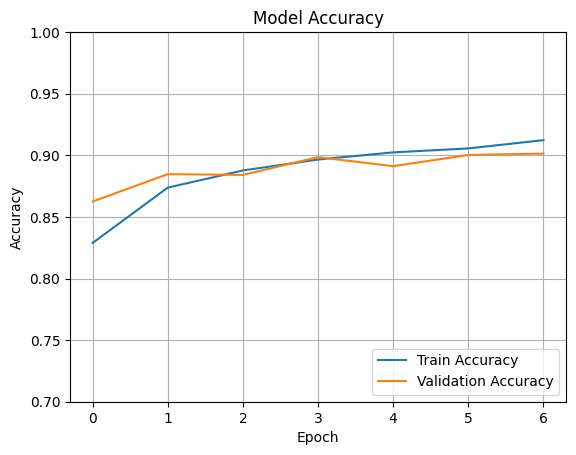

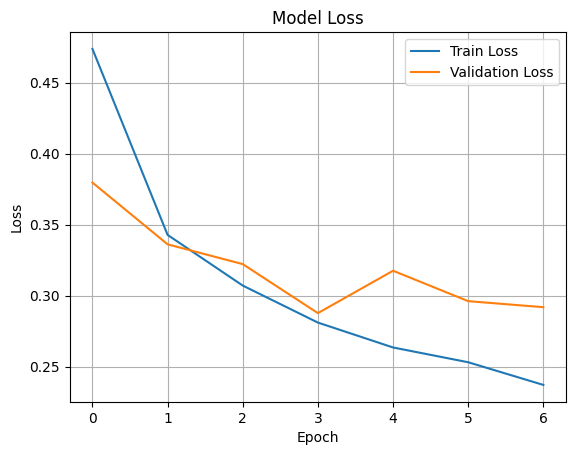

In [74]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim([0.7, 1.0])  # Adjust based on your results
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [75]:
model.save('trained_fashion_mnist_model.h5')